In [1]:
# from __future__ import print_function, division

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Part 1

In [3]:
def integrate(y, dx):
    """
    Takes an array of y-values and a step size dx of the corresponding x values 
    and numerically integrates the function, returning the final value
    """
    counter = 0
    for yi in y:
        counter += dx * yi
    return counter

In [4]:
def plot_fn(xarr, yarr, title=''):
    """
    Basic plotting function
    """
    plt.plot(xarr, yarr)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

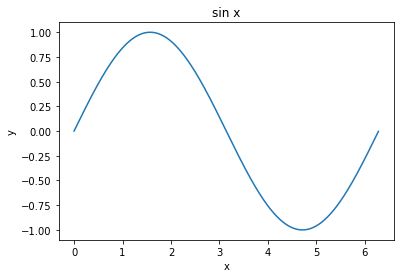

In [15]:
# TODO write code here to setup arrays x and y = sin(x) and then plot them by calling plot_fn
dx = .01
x = np.arange(0,int(2*np.pi/dx)+1) * dx
y = np.sin(x)

plot_fn(x, y, 'sin x')

In [6]:
# TODO then integrate y 
integrate(y, dx) #Smaller values of dx get us closer to 0

In [7]:
# TODO now use a np function to integrate y and compare
np.trapz(y, dx = dx)

In [8]:
# TODO find local maxima and minima of sinx from 0 to 6*pi
# TODO find local maxima and minima of sinx from 0 to 6*pi
x1 = np.arange(0,int(6*np.pi/dx)+1) * dx
y1 = np.sin(x1)

#look for changes in sign
diffarr = np.sign(np.diff(y1))

maxlist = []
minlist = []
for i in range(1,len(diffarr)):
    if diffarr[i-1] > diffarr[i]:
        maxlist.append(i*dx)
    elif diffarr[i-1] < diffarr[i]:
        minlist.append(i*dx)
print(maxlist)
minlist

# Part 2

In [18]:
def wavepacket(x, k, sigma):
    """
    This function creates a wavepacket on the interval defined by x with
    wavevector k and standard deviation sigma.
    """
    return np.sin(k*x) *  np.exp(-(x**2)/(2*sigma**2))

In [19]:
def noisy_packet(x_values, k, sigma, noise_amplitude):
    """
    This function returns a noisy Gaussian wavepacket with wave
    vector k, standard deviation sigma and Gaussian noise of standard
    deviation noise_amplitude.
    """
    clean_y = wavepacket(x_values,k,sigma)
    noisy_y = clean_y + noise_amplitude*np.random.randn(len(x_values))
    return noisy_y

In [20]:
def clean_data(x_values,y_values):
    """
    This function should take a set of y_values, perform the Fourier
    transform on it, filter out the high frequency noise, transform the
    signal back into real space, and return it.
    """

    # TODO edit this function
    y_fft = np.fft.rfft(y_values)# perform Fourier transform
    
    low_pass_filter = np.ones(y_fft.shape) # build low pass filter for Fourier function
    num_freq = y_fft.size
    low_pass_filter[int(num_freq/25):num_freq] = 0
    low_pass_filter = low_pass_filter * y_fft
    y_clean_values = np.fft.irfft(low_pass_filter, len(y_values))
    
    return y_clean_values

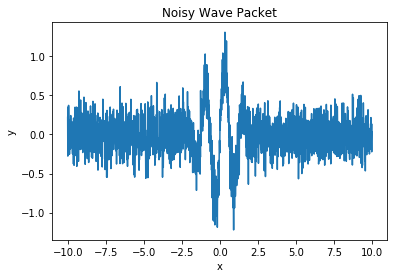

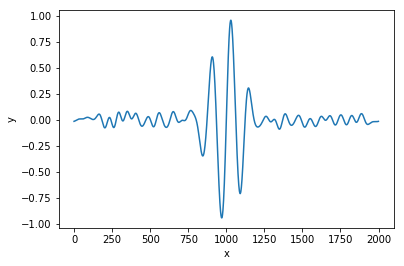

In [21]:
# TODO call noisy_packet() to get a Gaussian wave packet, 
# call clean_data() to apply a low pass filter to the data, and
# finally plot the result using plot_fn
temp = range(int(-10/dx), int(10/dx),1)
xvals = np.array(temp)*dx

ynoise = noisy_packet(xvals, 5,1,.2)
plot_fn(xvals,ynoise, 'Noisy Wave Packet')

yclean = clean_data(xvals, ynoise)
yclean
plot_fn(range(0,len(yclean)), yclean)

# Part 3

In [13]:
# TODO mask the arrays, then plot

In [14]:
# TODO try to generate masked noisy data and then clean it